//PEW is a really interesting database. Crosstab and topline files give all the information about the variables used and the results obtained, some of them being really interesting like gaming and job search. After having gone through all the files and the variables, i have decided to pick these many topics:
1) Cable analysis
2) Get sports analysis
3) Date2a - people having dating apps
4) People playing video games (game1)
5) Most people who play video games are men
6) Job search
7) people using social networking for job search
6) Ideology of people (conservative, liberal, moderate)

I will do analysis on these categories to see how they differ with gender and age or salary. First, I will clean the data removing the 'NA' or 'Do not want to answer fields'. Second, I will munge the data keeping only the fields required and converting and saving it to a csv file. Then using different functions from dplyr, I will find the facts and plot them using qplot.

In [ ]:
library(dplyr)

In [ ]:
library(ggplot2)

file name: 'June 10-July 12, 2015 – Gaming, Jobs and Broadband - csv' is changed to broadband.csv. It is the same file. Just renamed. It is included in the submitted folder.

In [ ]:
B=read.csv('/Users/anandpopat/desktop/broadband.csv')

In [ ]:
B

//searched for all the fields that are required for the topics using the questionnaire and cosstab file. They are as follows.

age,race,sex,inc,cable1,q5f,q5d,date2a,game1,game3a,job5d,snsjob2a,ideo. Will make a new csv file having only these categories as they are only needed.

In [ ]:
B=select(B,psraid,age,race,sex,inc,cable1,q5f,q5d,date2a,game1,game3a,job5d,snsjob2a,ideo)

In [ ]:
write.csv(B,file='/Users/anandpopat/desktop/activity3.csv')

convert the 'NA' values to 0. To filter them out later

In [ ]:
B[is.na(B)]<-0
B

//'Do you currently receive television via cable or satellite at home, or not' according to age distribution

//Q1: What is the age distribution of the people having a cable at home or not? Do young people have cable at home a.k.a do they watch television at home more or the aged people?

//A1:
1) select the age and cable1 from the csv file because they are the only ones needed for these. 
2) removed the entries with value 8 (did not answer)
3) distributed age in three divisions for better readability. '18-29', '30-49', '50-64', 'over 65'
4) changed the categories of cable to 'receive (1)' or 'not receive (2)' for better readability
5) plotted a bar graph using ggplot.

The graph below indicates that more number of people of age 'over 65' have cable connection at home than any other age group. 
So maybe (can be implied) aged people watch more television !!!

In [ ]:
q1=select(B,age,cable1)
q1=filter(q1,cable1<8)
q1$age[q1$age>=18 & q1$age<=29]<-'18-29'
q1$age[q1$age>=30 & q1$age<=49]<-'30-49'
q1$age[q1$age>=50 & q1$age<=64]<-'50-64'
q1$age[q1$age>=65]<-'over 65'

q1$cable1[q1$cable1==1]<-'Receive'
q1$cable1[q1$cable1==2]<-'Does not receive'


q1


In [ ]:
ggplot(q1, aes(age, cable1, fill = as.factor(cable1))) + geom_bar(stat = "identity")

//'Do you ever use your cellphone to get sports analysis' according to sex distribution

//Q2: Who checks their phone more to get sports updates, male or female?

//A2:
1) select sex and answers to sports analysis question i.e field 'q5d' from the saved csv.
2) rename the columns for better understandability
3) remove all the 'NA' values
4) change the categoty sex to 'male (1)' and 'female (2)'
5) change the category sports to 'check for updates', 'does not check for updates'
6) plot the observation in bar graph using ggplot

From the graph, we can say that males check their phones to receive sports updates more than females. 
Conforming the popular belief, men are more into sports !!!

In [ ]:
q2=select(B,sex,q5d)
colnames(q2)=c('sex','sports')
q2[is.na(q2)]<-0
q2=filter(q2,sports>0)
q2$sex[q2$sex==1]<-'Male'
q2$sex[q2$sex==2]<-'Female'
q2$sports[q2$sports==1]<-'Check for updates'
q2$sports[q2$sports==2]<-'Does not check for updates'
q2

In [ ]:
ggplot(q2, aes(sex, sports, fill = as.factor(sports))) + geom_bar(stat = "identity")

//'Have you ever used a dating app on your cell phone' analysis according to age and sex.

//Q3: Who uses dating apps more, men or women? What age group uses the dating apps the most?

//A3:
1) select sex,age,date2a (Have you ever used a dating app on your cell phone) from the csv file.
2) remove all the 'NA' terms
3) group the age into 4 categories '18-29', '30-49', '50-64', 'over 65'.
4) change the values of sex category to 'male','female'
6) only select the people who use the dating app to know and compare the count
7) only select the people who dont use the dating app to know and compaare their count.

There are 6 histograms in this answer. The first 3 are for sex distribution. In that the first shows the total count of people who answered this question (male,female). The second shows the count of males and females who use the dating app. It can be seen that males might be using it more. The third shows the count of males and females who don't use the dating app which confirms our conclusion that males do use dating apps more than women do by a slight margin.

The last 3 hitograms are for age distribution. In that the first shows the total count of the people who answered this question. The second shows the age distribution of the people using the dating app. It can be seen that people in age group '18-29' use it the most and 'over 65' almost never use it. The third shows the age distribution of the people who don't use it.

In [ ]:
q3=select(B,sex,age,date2a)
q3[is.na(q3)]<-0
q3=filter(q3,date2a>0)
q3$age[q3$age>=18 & q3$age<=29]<-'18-29'
q3$age[q3$age>=30 & q3$age<=49]<-'30-49'
q3$age[q3$age>=50 & q3$age<=64]<-'50-64'
q3$age[q3$age>=65]<-'over 65'
q3$sex[q3$sex==1]<-'Male'
q3$sex[q3$sex==2]<-'Female'


q3a=filter(q3,date2a==1)
q3b=filter(q3,date2a==2)



In [ ]:
qplot(data=q3,x=sex)
qplot(data=q3a,x=sex)
qplot(data=q3b,x=sex)

In [ ]:
qplot(data=q3,x=age)
qplot(data=q3a,x=age)
qplot(data=q3b,x=age)

//'Has information that you’ve posted on social media ever helped you get a job' race and distribution based on income.

//Q4a: What do people from different race think about social media like linkedin, facebook etc to get a job?
Q4b: Do people from different income groups think differently about social media's help in finding job?

//A4a: 
1) select only the race, income and 'Has information that you’ve posted on social media ever helped you get a job' category from the csv file.
2) remove the NAs
3) Dont include the 'dont know's or 'dont want to answer's
4) rename the columns
5) select 4 races: white, black, asian, native americans (Interested in those 4)
6) change the values of the race variable to actual names.
7) change the values of job category to 'helped' or 'not helped'
8) plot the bar graph using ggplot

From the graph, it can be inferred that white people think that social media does not help in finding job more than the people from other races. Asians and Natives have a 50-50 say in it. 

//A4b:
1) select only the income and job categories
2) remove 'dont want to answer' from job category
3) group the categories into 4 groups based on income
4) plot the bar graph using ggplot

From the graph, it can be said that people from all the income groups think alike about this matter. Majority in all the 4 groups believe that social media DOESN'T help in finding jobs. 

In [ ]:
q4=select(B,race,inc,snsjob2a)
q4[is.na(q4)]<-0
q4=filter(q4,snsjob2a>0 & snsjob2a<8)
colnames(q4)=c('race','income','job')
q4=filter(q4,race==1 | race==2 | race==3 | race==5)

q4$race[q4$race==1]<-'White'
q4$race[q4$race==2]<-'Black'
q4$race[q4$race==3]<-'Asian'
q4$race[q4$race==5]<-'Native'

q4$job[q4$job==1]<-'Helped'
q4$job[q4$job==2]<-'Did not help'

q4a=select(q4,race,job)

q4b=select(q4,income,job)
q4b=filter(q4b,income<98)
q4b$income[q4b$income<4]<-'<$30,000'
q4b$income[q4b$income==4 | q4b$income==5]<-'$30,000 - $49,999'
q4b$income[q4b$income==6]<-'$50,000 - $75,000'
q4b$income[q4b$income>6]<-'$75,000+'
q4b

In [ ]:
ggplot(q4a, aes(race, job, fill = as.factor(job))) + geom_bar(stat = "identity")

In [ ]:
ggplot(q4b, aes(income, job, fill = as.factor(job))) + geom_bar(stat = "identity")

//'In general, would you describe your political views as' sex and age distribution

//Q5a: Who is more conservative/moderate/liberal? men or women?
//Q5b: Which age group is more conservative/moderate/liberal?

//A5: 
1) select age, sex, ideology from the csv file
2) change the sex category to actual 'male' 'female'
3) group the age into 4 categories '18-29', '30-49', '50-64', 'over 65'.
4) remove 'don't wanna answer' from ideology
5) group the ideology category into 'conservative','moderate','liberal'
6) filter the table to only get the count of conservative/moderate/liberal
7) plot the histogram using qplot

There are 8 histograms in total. The first four show the sex distribution. In that the first is the total number of males and females who answered. The number is almost the same. The second is the count of conservative. Men seem to be more conservative than female. The third is the count of liberal. Women seem to be more liberal than men. The fourth is the count of moderate which is the same for both male and female.

The last 4 histograms show the age distribution. In that the first is the total number of people from each age group who answered. The second shows the count of conservatives. The old age group is the  most conservative. The second shows the count of liberal. The young age groups i.e 30-49 are more liberal. The third is for the count of moderate. The middle aged group i.e 50-64 are more moderate.

In [172]:
q5=select(B,sex,age,ideo)
q5$sex[q5$sex==1]<-'Male'
q5$sex[q5$sex==2]<-'Female'

q5$age[q5$age>=18 & q5$age<=29]<-'18-29'
q5$age[q5$age>=30 & q5$age<=49]<-'30-49'
q5$age[q5$age>=50 & q5$age<=64]<-'50-64'
q5$age[q5$age>=65]<-'over 65'

q5=filter(q5,ideo<8)
q5$ideo[q5$ideo==1 | q5$ideo==2]<-'conservative'
q5$ideo[q5$ideo==3]<-'moderate'
q5$ideo[q5$ideo==4 | q5$ideo==5]<-'liberal'

q5a=filter(q5,ideo=='conservative')
q5b=filter(q5,ideo=='liberal')
q5c=filter(q5,ideo=='moderate')

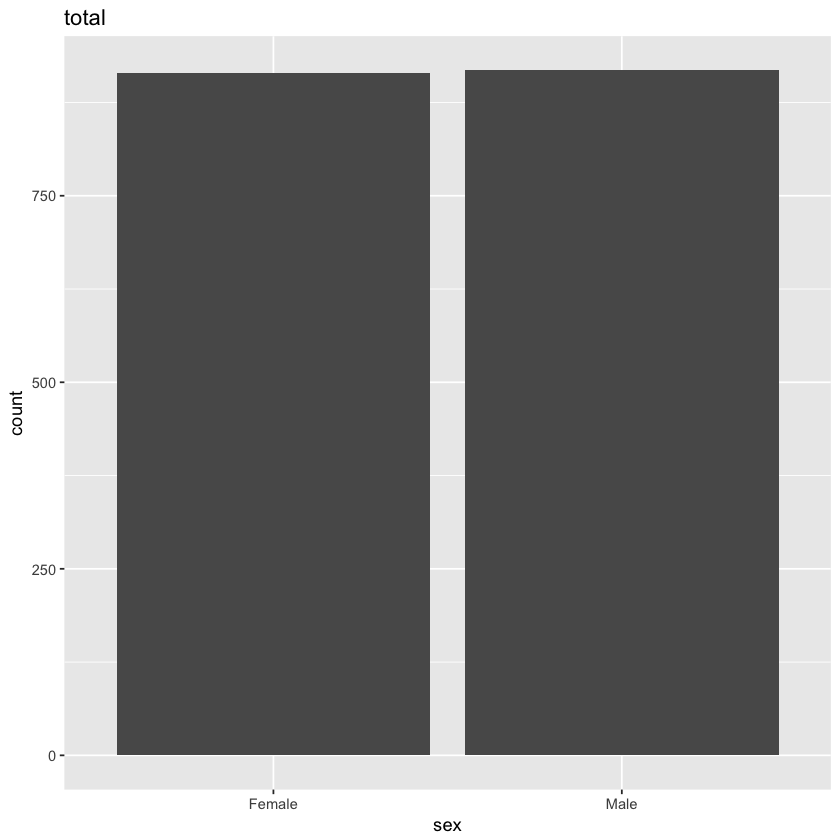

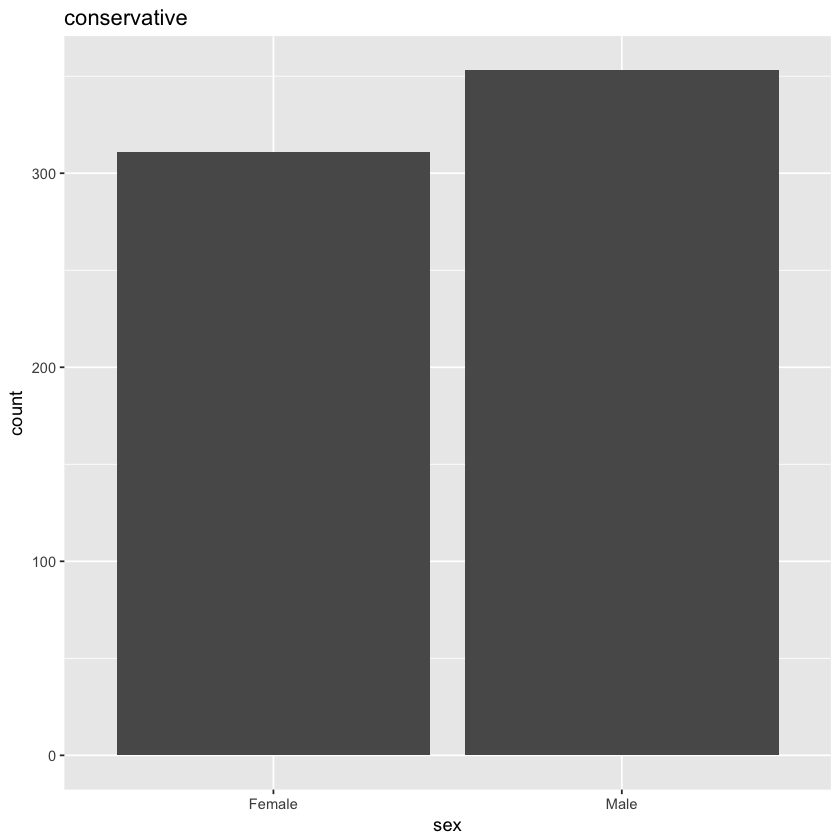

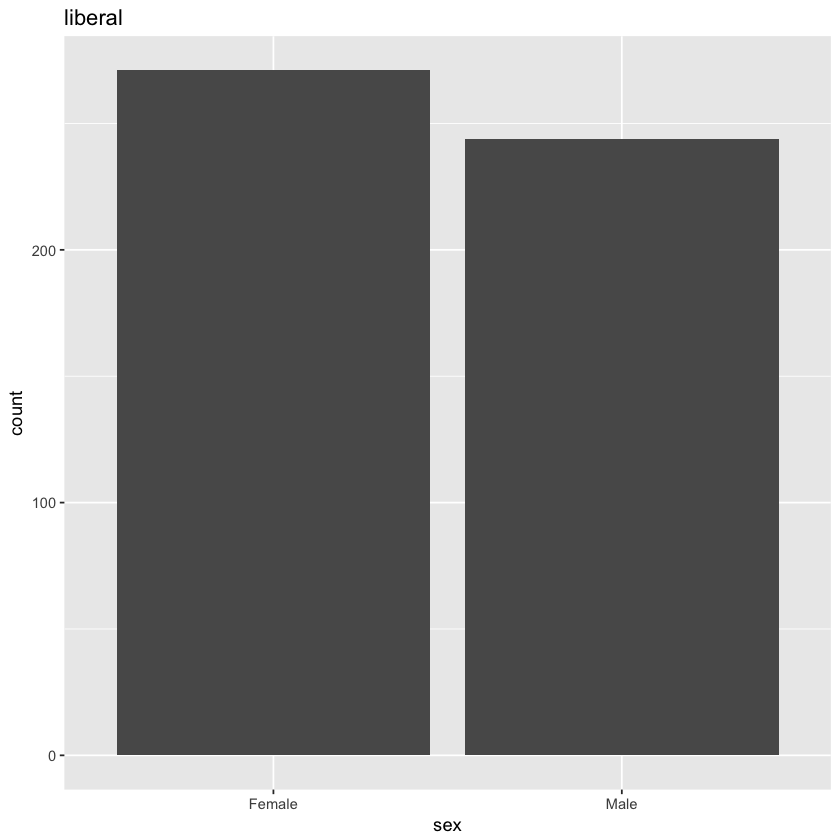

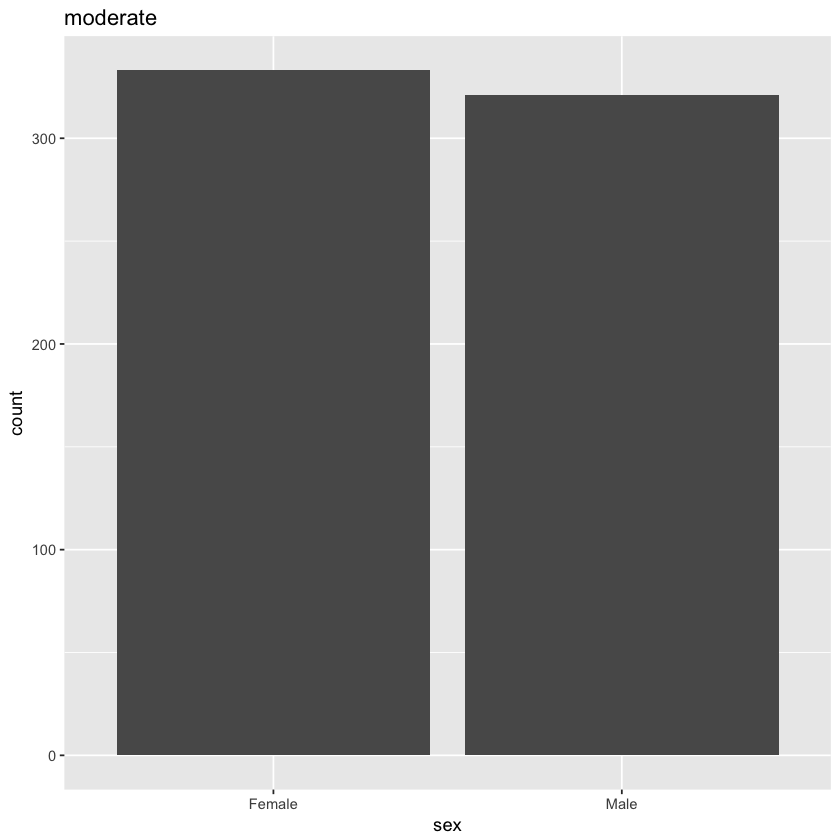

In [176]:
qplot(data=q5,x=sex,main='total')
qplot(data=q5a,x=sex,main='conservative')
qplot(data=q5b,x=sex,main='liberal')
qplot(data=q5c,x=sex,main='moderate')

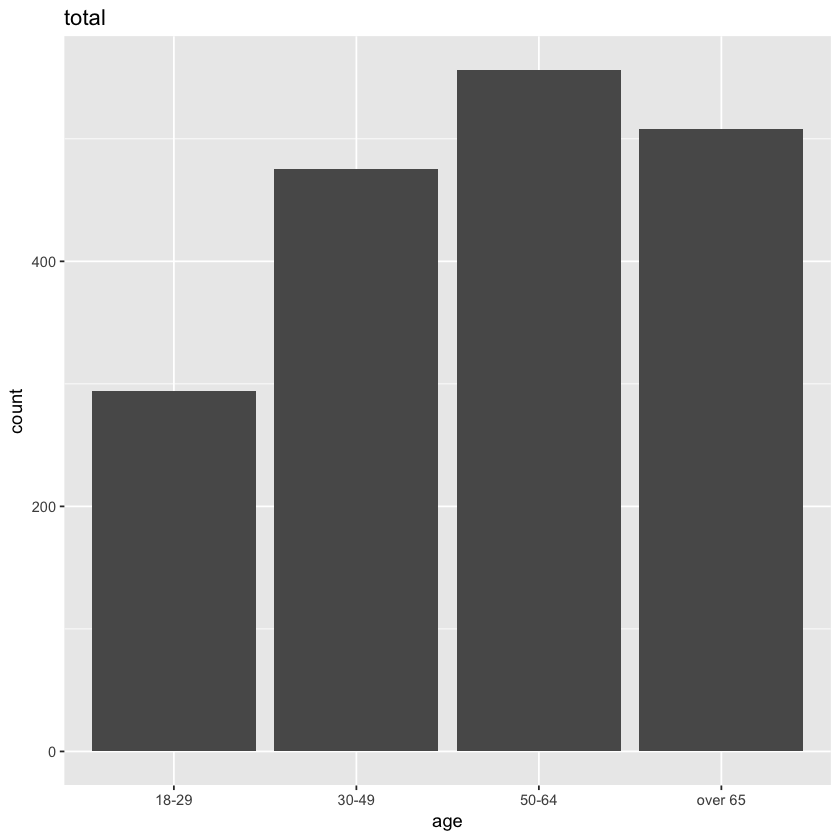

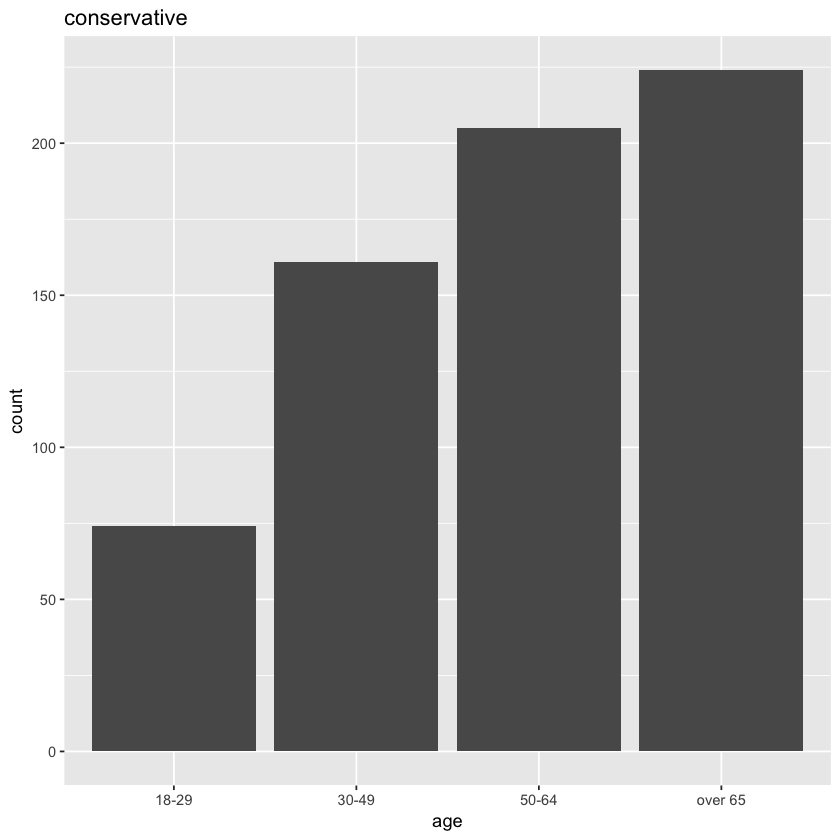

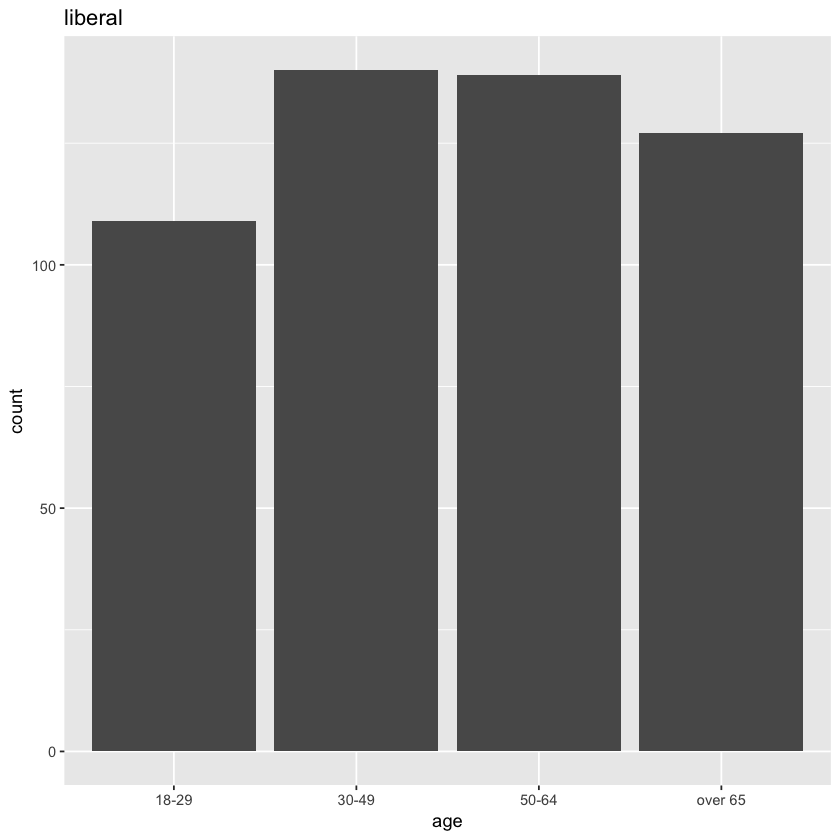

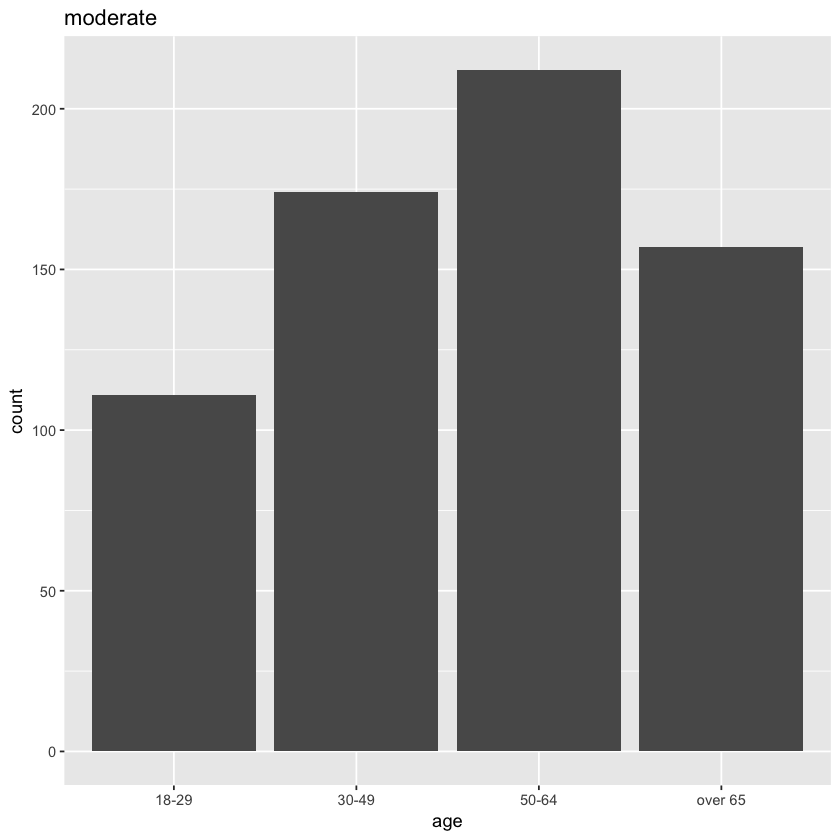

In [175]:
qplot(data=q5,x=age,main='total')
qplot(data=q5a,x=age,main='conservative')
qplot(data=q5b,x=age,main='liberal')
qplot(data=q5c,x=age,main='moderate')

REFERENCES: 
1) Pew Research Center. http://www.pewresearch.org/
2) Pew Research Center Datasets, http://www.pewinternet.org/datasets/
3) Pew Research Data set for Lab2: https://buffalo.box.com/s/tjf7suaux5batnvo03pbrjom6josu0h7
4) http://stackoverflow.com/questions/21653704/producing-bar-chart-of-a-vector-using-qplot-in-r
5) http://www.statmethods.net/advgraphs/ggplot2.html
6) http://docs.ggplot2.org/dev/vignettes/qplot.html
7) https://www.r-bloggers.com/basic-introduction-to-ggplot2/
8) R Vignette for dplyr: https://cran.r-project.org/web/packages/dplyr/vignettes/databases.html
